<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [3]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [4]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [6]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [7]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
df = pd.read_csv(filepath)

In [8]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [10]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [11]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [12]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [13]:
df_sydney_processed = df_sydney_processed.astype(float)

In [14]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [15]:
x_train, x_test, Y_train, Y_test = train_test_split(features, Y, test_size=.2, random_state=10)


In [16]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((2616, 66), (655, 66), (2616,), (655,))

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [17]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(x_train, Y_train)
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-0.02369173  0.01300554  0.00072981  0.00649077 -0.03516427  0.00423762
  0.0018292   0.00078986  0.00095609  0.00856061  0.00769793 -0.00924424
 -0.00887454  0.01004774  0.01446555 -0.00348065 -0.05402493  0.05402493
  0.05039419 -0.07898527  0.06640003 -0.0721012  -0.05945626 -0.08239011
 -0.0789619   0.06418738 -0.00838878  0.11105128  0.01414852  0.03851666
  0.03625722 -0.02133122  0.00395909  0.01670037  0.04350405  0.05317842
 -0.00692976 -0.01911823 -0.01461142 -0.00594829 -0.07546046  0.04176858
 -0.00758587 -0.00980346 -0.01874997  0.00302978  0.01914623 -0.0012425
 -0.01756641  0.01638932 -0.09330032 -0.08339081 -0.01838672 -0.05191842
 -0.04092463  0.03423083  0.06883841  0.01862747  0.06892422  0.00033817
 -0.04820507  0.0755034   0.03967488  0.02636872 -0.02236214  0.02598199]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


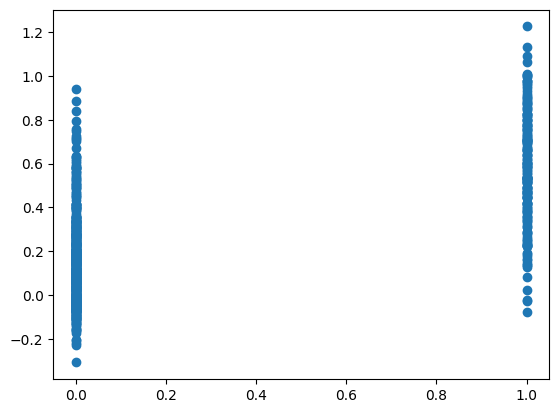

In [19]:
predictions=0
predictions = LinearReg.predict(x_test)
plt.scatter(Y_test, predictions)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [20]:
from sklearn import metrics
LinearRegression_MAE = metrics.mean_absolute_error(Y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(Y_test, predictions)
LinearRegression_R2 = np.sqrt(metrics.mean_squared_error(Y_test, predictions))

print("LinearRegression_MAE: ", LinearRegression_MAE, "LinearRegression_MSE:", LinearRegression_MSE, "LinearRegression_R2: ", LinearRegression_R2)

LinearRegression_MAE:  0.25631760994203784 LinearRegression_MSE: 0.11572058282746588 LinearRegression_R2:  0.34017728146874515


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [21]:
Report = {"Metrics":["MAE","MSE","R2"],"Result":
[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Result
0,MAE,0.256318
1,MSE,0.115721
2,R2,0.340177


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [22]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,Y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [23]:
predictions2 = KNN.predict(x_test)
predictions2[0:5]

array([0., 0., 1., 0., 0.])

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [24]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test, predictions2)
KNN_JaccardIndex = jaccard_score(Y_test, predictions2,pos_label=0)
KNN_F1_Score = f1_score(Y_test, predictions2, pos_label=1, average='binary')

Report2 = {"Metrics KNN":["Accuracy","JaccardIndex","F1Score"],"Result":
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score]}
pd.DataFrame(Report2)

,Metrics KNN,Result
0,Accuracy,0.818321
1,JaccardIndex,0.790123
2,F1Score,0.596610


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [25]:
from sklearn import tree
Tree = tree.DecisionTreeClassifier()
Tree= Tree.fit(x_train, Y_train)
Tree

DecisionTreeClassifier()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [26]:
predictions3 = Tree.predict(x_test)
predictions3

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1.

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [27]:
Tree_Accuracy_Score =  metrics.accuracy_score(Y_test, predictions3)
Tree_JaccardIndex = jaccard_score(Y_test, predictions3,pos_label=0)
Tree_F1_Score = f1_score(Y_test, predictions3, pos_label=1, average='binary')


Report3 = {"Metrics Tree":["Accuracy","JaccardIndex","F1Score"],"Result":
[Tree_Accuracy_Score ,Tree_JaccardIndex,Tree_F1_Score]}
pd.DataFrame(Report3)

,Metrics Tree,Result
0,Accuracy,0.752672
1,JaccardIndex,0.707052
2,F1Score,0.557377


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [28]:
x_train2, x_test2, Y_train2, Y_test2 = train_test_split(features, Y, test_size=.2, random_state=1)
x_train2.shape, x_test2.shape, Y_train2.shape, Y_test2.shape

((2616, 66), (655, 66), (2616,), (655,))

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [29]:
LR = LogisticRegression(C=1.0, solver='liblinear').fit(x_train2,Y_train2)
print ('Coefficients: ', LR.coef_)

Coefficients:  [[-0.1808252   0.03818342  0.01219923  0.00784304 -0.22765501  0.03576754
   0.01000202  0.00784357  0.02630438  0.05123969  0.07600403 -0.08383714
  -0.11625464  0.16731178  0.15975055  0.01436517 -0.13081443  0.17606197
   0.62876715 -1.10041929  0.41565592 -0.45445477 -0.32461254 -0.52099404
  -0.11089911  0.00312709 -0.04890579  0.58862663  0.17217207 -0.01283615
   0.17449295 -0.17423129  0.58635623  0.22340248  0.25370551  0.15388845
  -0.00268508 -0.0856236  -0.08554853  0.14631863 -0.01280642  0.33260278
  -0.32272965  0.0042751  -0.06548341 -0.17874258  0.16077671 -0.01699467
   0.01773156 -0.25343725 -0.6420821  -0.5455981  -0.01224173 -0.55614358
  -0.34895047  0.30167422  0.18838496 -0.26689817  0.68477966  0.26253044
   0.06200746  0.75868476  0.45568568  0.12680853 -0.55382925  0.13043523]]


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [30]:
predictions4 = LR.predict(x_test2)
predictions4

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0.

In [31]:
predict_proba = LR.predict_proba(x_test2)
predict_proba

array([[0.74574813, 0.25425187],
       [0.97506424, 0.02493576],
       [0.50824637, 0.49175363],
       ...,
       [0.98014873, 0.01985127],
       [0.70131324, 0.29868676],
       [0.22307435, 0.77692565]])

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [32]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test2, predictions4)
LR_JaccardIndex = jaccard_score(Y_test2, predictions4,pos_label=0)
LR_F1_Score = f1_score(Y_test2, predictions4, pos_label=1, average='binary')
LR_Log_Loss = log_loss(Y_test2, predictions4)

Report4 = {"Metrics Logistic Regression":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result":
[LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss]}
pd.DataFrame(Report4)

,Metrics Logistic Regression,Result
0,Accuracy,0.836641
1,JaccardIndex,0.803309
2,F1Score,0.674772
3,LogLoss,5.888047


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [33]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train2, Y_train2)

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [34]:
predictions5 = SVM.predict(x_test2)
predictions5 [0:5]

array([0., 0., 0., 0., 0.])

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [35]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test2, predictions5)
SVM_JaccardIndex = jaccard_score(Y_test2, predictions5,pos_label=0)
SVM_F1_Score = f1_score(Y_test2, predictions5, pos_label=1, average='binary')

Report5 = {"Metrics SVM":["Accuracy","JaccardIndex","F1Score"],"Result":
[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score]}
pd.DataFrame(Report5)

,Metrics SVM,Result
0,Accuracy,0.722137
1,JaccardIndex,0.722137
2,F1Score,0.000000


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [36]:
ReportFinal = {"Total Metrics SVM":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result Metrics KNN":
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score,""],"Result Metrics Tree":[Tree_Accuracy_Score ,Tree_JaccardIndex,Tree_F1_Score,""], "Result Metrics Logistic Reg": [LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss], "Results Metrics SVM":[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score,""]}
pd.DataFrame(ReportFinal)

,Total Metrics SVM,Result Metrics KNN,Result Metrics Tree,Result Metrics Logistic Reg,Results Metrics SVM
0,Accuracy,0.818321,0.752672,0.836641,0.722137
1,JaccardIndex,0.790123,0.707052,0.803309,0.722137
2,F1Score,0.59661,0.557377,0.674772,0.0
3,LogLoss,,,5.888047,
